## 用RANSAC拟合基准线

In [33]:
%matplotlib inline
import pylab as pl
import numpy as np
from sklearn.linear_model import LinearRegression, RANSACRegressor
from matplotlib import style
style.use("bmh")

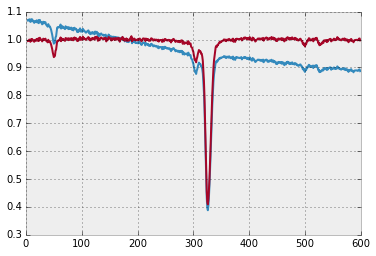

In [34]:
y = np.loadtxt("data.txt")
y2 = np.loadtxt("data2.txt")
x = np.arange(len(y))
pl.plot(x, y)
pl.plot(x, y2);

为了拟合基准线，需要自动忽略不是基准线的数据，可以使用RANSAC算法，scikit-learn提供了实现该算法的类`RANSACRegressor`：

http://scikit-learn.org/stable/modules/linear_model.html#ransac-random-sample-consensus

我们的模型是一个线性拟合`LinearRegression`，使用`RANSACRegressor`包装该模型：

In [20]:
model = RANSACRegressor(LinearRegression())
X = np.c_[x, x**2]
model.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, normalize=False),
        is_data_valid=None, is_model_valid=None, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

与Origin手工调整的数据比较：

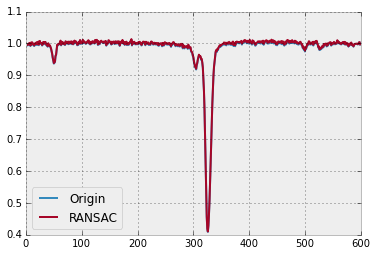

In [36]:
pl.plot(x, y2, label="Origin")
pl.plot(x, y / model.predict(X).ravel(), label="RANSAC")
pl.legend(loc="best");